<a href="https://colab.research.google.com/github/carolsabara/Telecom_x_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from multiprocessing.context import ForkServerContext
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/carolsabara/Telecom_x_2/main/dados_tratados.csv')
df.head()

,id,Churn,genero,tem_60mais,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,...,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias,Churn_binaria,faixa_valor
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30,2.186667,0,Médio
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40,1.996667,0,Médio
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fiber optic,...,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.463333,1,Médio
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fiber optic,...,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.266667,1,Alto
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fiber optic,...,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.796667,1,Médio


#🔧 Transformação

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7032 non-null   object 
 1   Churn                 7032 non-null   object 
 2   genero                7032 non-null   object 
 3   tem_60mais            7032 non-null   int64  
 4   possui_parceiro       7032 non-null   object 
 5   possui_dependentes    7032 non-null   object 
 6   tempo_contrato        7032 non-null   int64  
 7   servico_telefone      7032 non-null   object 
 8   multiplas_linhas      7032 non-null   object 
 9   tipo_internet         7032 non-null   object 
 10  seguranca_online      7032 non-null   object 
 11  backup_online         7032 non-null   object 
 12  protecao_dispositivo  7032 non-null   object 
 13  suporte_tecnico       7032 non-null   object 
 14  streaming_tv          7032 non-null   object 
 15  streaming_filmes     

In [ ]:
df = df.drop(columns='id')

In [ ]:
df.columns

Index(['Churn', 'genero', 'tem_60mais', 'possui_parceiro',
       'possui_dependentes', 'tempo_contrato', 'servico_telefone',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'total_cobrado', 'contas_diarias',
       'Churn_binaria', 'faixa_valor'],
      dtype='object')

In [ ]:
cols_to_fix = [
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_filmes', 'streaming_tv',
]

In [ ]:
for col in cols_to_fix:
    df[col] = df[col].replace( 'Sem serviço de internet', 'Não')

In [ ]:
#verificar os nulos
df.isnull().sum()

,0
Churn,0
genero,0
tem_60mais,0
possui_parceiro,0
possui_dependentes,0
tempo_contrato,0
servico_telefone,0
multiplas_linhas,0
tipo_internet,0
seguranca_online,0


#📊 EDA

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float'])
corr_matrix = df_numeric.corr()


Text(0.5, 1.0, 'Matrix de correlação - Variáveis númericas')

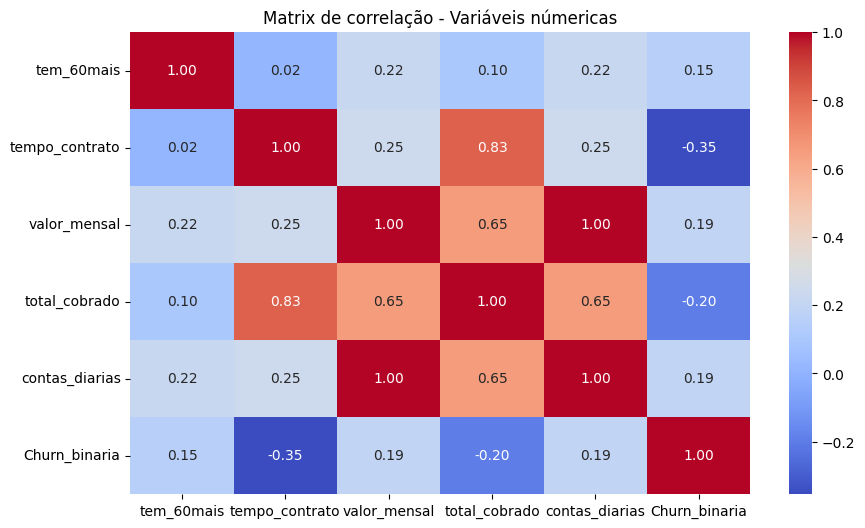

In [ ]:
#vizualizar o heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot= True, cmap ='coolwarm', fmt = '.2f')
plt.title('Matrix de correlação - Variáveis númericas')

In [ ]:
df = df.drop(columns=['contas_diarias', 'total_cobrado'])

## Correlação com Churn mais forte é a variavel tempo de contrato que possui -0.35
## insight quanto maior o tempo de contrato menor a chance de Churn  

# 2️⃣ Análise de churn por categoria (variáveis

1.   Item da lista
2.   Item da lista

categóricas)


In [ ]:
categorical_cols = df.select_dtypes(include = ['object']).columns
categorical_cols = categorical_cols.drop("Churn", errors='ignore')

# 🔹 Tabela de proporção de churn por categoria

In [ ]:
for col in categorical_cols:
  print(f'\n 📌 Análise da variável: {col}')
  #Criando tabela de % dentro de cada categoria de uma vari[avel.]
  display(pd.crosstab(df[col], df['Churn_binaria'], normalize = 'index')* 100)


 📌 Análise da variável: genero


Churn_binaria,0,1
genero,,
Feminino,73.040482,26.959518
Masculino,73.795435,26.204565



 📌 Análise da variável: possui_parceiro


Churn_binaria,0,1
possui_parceiro,,
Não,67.023908,32.976092
Sim,80.282935,19.717065



 📌 Análise da variável: possui_dependentes


Churn_binaria,0,1
possui_dependentes,,
Não,68.720860,31.279140
Sim,84.468795,15.531205



 📌 Análise da variável: servico_telefone


Churn_binaria,0,1
servico_telefone,,
Não,75.000000,25.000000
Sim,73.252519,26.747481



 📌 Análise da variável: multiplas_linhas


Churn_binaria,0,1
multiplas_linhas,,
Não,74.918759,25.081241
Sem serviço de telefone,75.000000,25.000000
Sim,71.351534,28.648466



 📌 Análise da variável: tipo_internet


Churn_binaria,0,1
tipo_internet,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
Não,92.565789,7.434211



 📌 Análise da variável: seguranca_online


Churn_binaria,0,1
seguranca_online,,
Não,68.626669,31.373331
Sim,85.359801,14.640199



 📌 Análise da variável: backup_online


Churn_binaria,0,1
backup_online,,
Não,70.78359,29.21641
Sim,78.43299,21.56701



 📌 Análise da variável: protecao_dispositivo


Churn_binaria,0,1
protecao_dispositivo,,
Não,71.304725,28.695275
Sim,77.460711,22.539289



 📌 Análise da variável: suporte_tecnico


Churn_binaria,0,1
suporte_tecnico,,
Não,68.770032,31.229968
Sim,84.803922,15.196078



 📌 Análise da variável: streaming_tv


Churn_binaria,0,1
streaming_tv,,
Não,75.629476,24.370524
Sim,69.885313,30.114687



 📌 Análise da variável: streaming_filmes


Churn_binaria,0,1
streaming_filmes,,
Não,75.563822,24.436178
Sim,70.047602,29.952398



 📌 Análise da variável: tipo_contrato


Churn_binaria,0,1
tipo_contrato,,
Anual,88.722826,11.277174
Bienal,97.151335,2.848665
Mensal,57.290323,42.709677



 📌 Análise da variável: fatura_digital


Churn_binaria,0,1
fatura_digital,,
Não,83.624302,16.375698
Sim,66.410749,33.589251



 📌 Análise da variável: metodo_pagamento


Churn_binaria,0,1
metodo_pagamento,,
Cartão de créd. (automático),84.746877,15.253123
Cheque eletrônico,54.714588,45.285412
Cheque enviado,80.798005,19.201995
Transferência Banc. (automática),83.268482,16.731518



 📌 Análise da variável: faixa_valor


Churn_binaria,0,1
faixa_valor,,
Alto,65.926558,34.073442
Baixo,84.093817,15.906183
Médio,70.234542,29.765458


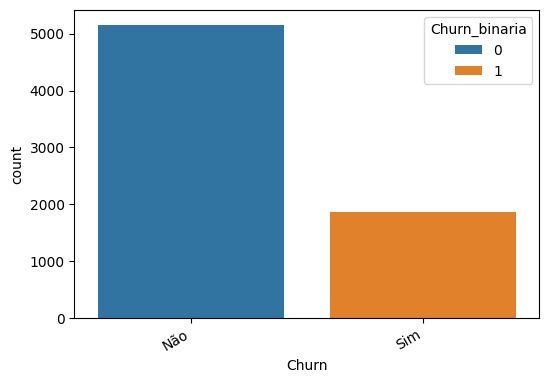

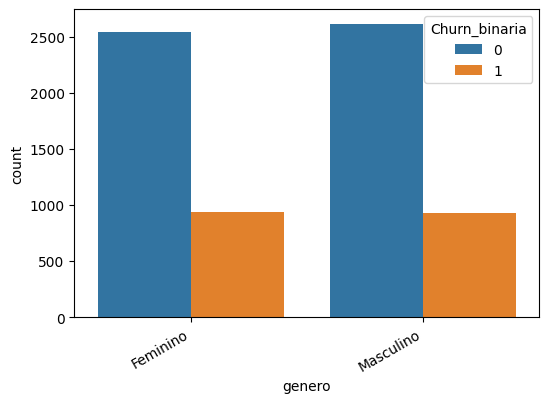

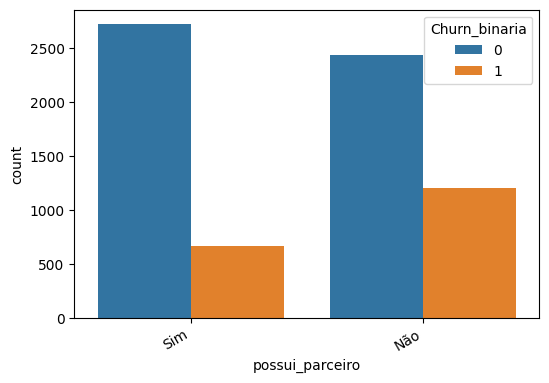

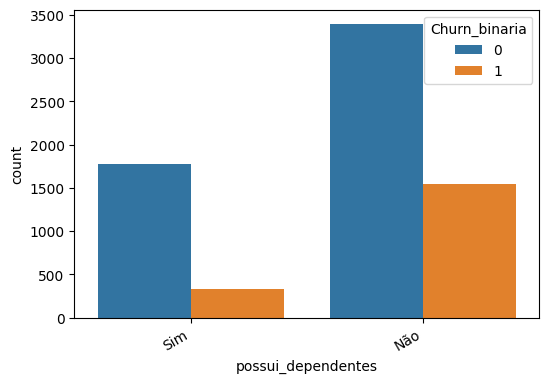

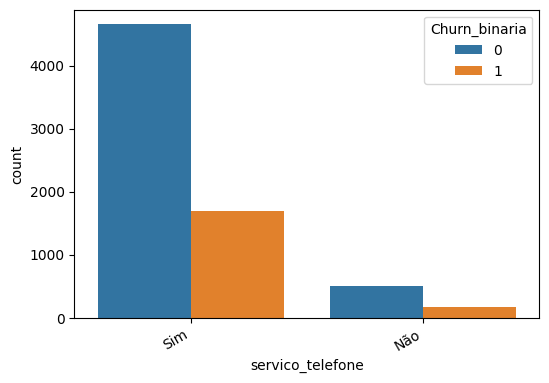

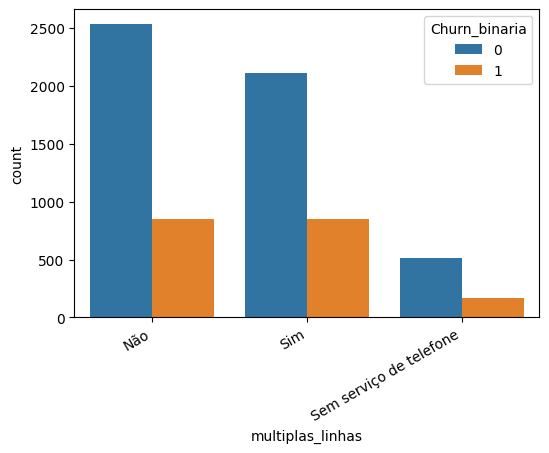

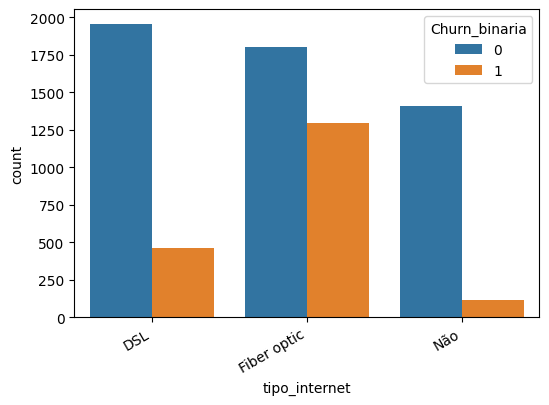

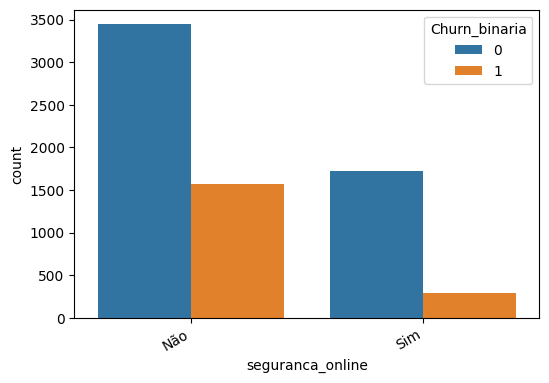

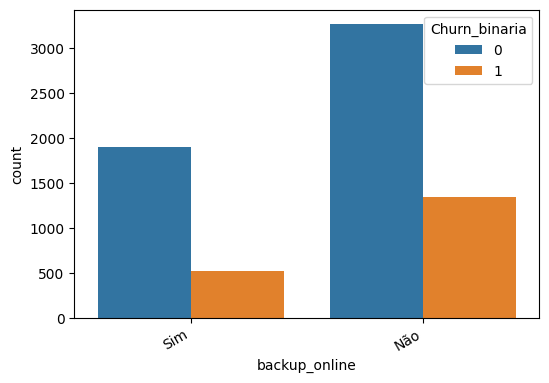

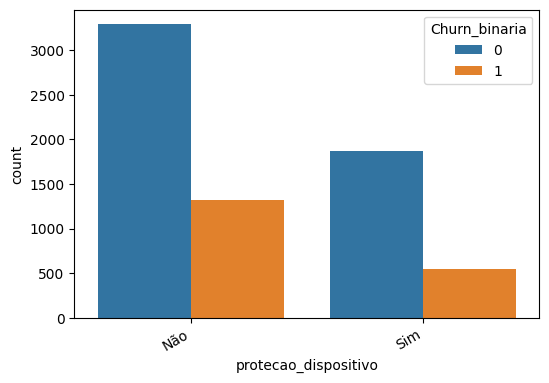

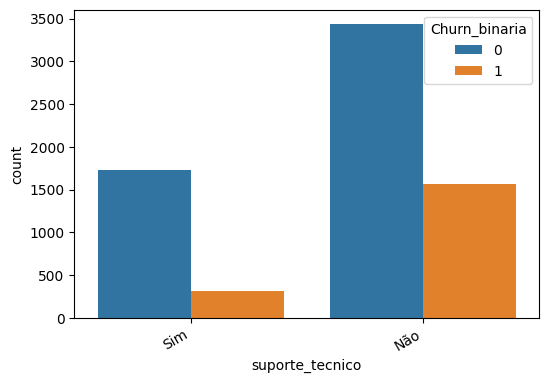

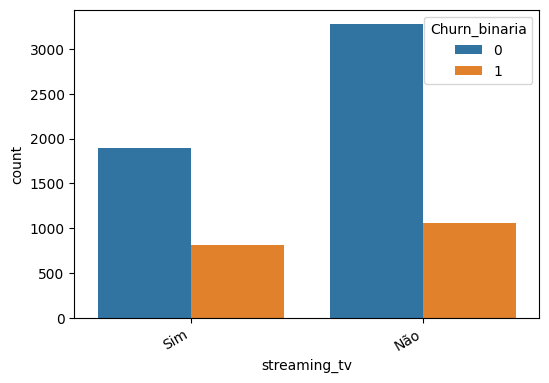

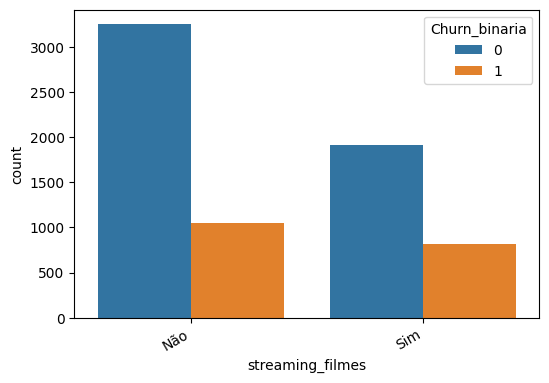

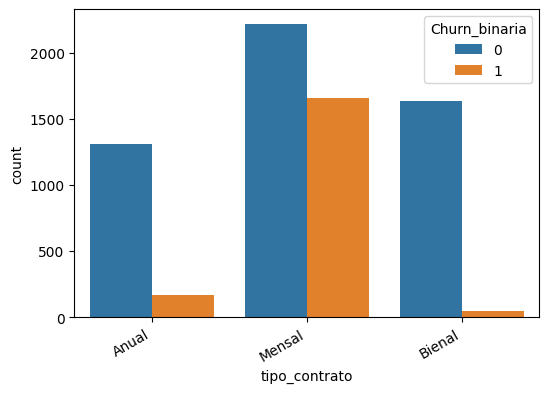

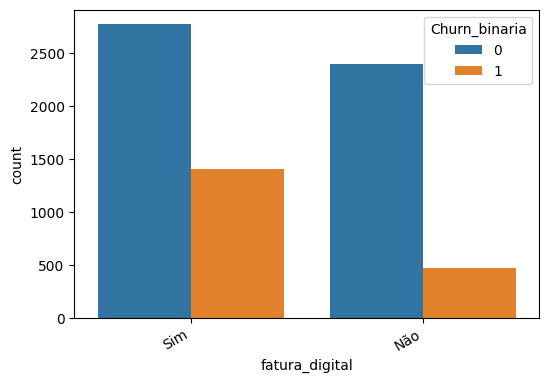

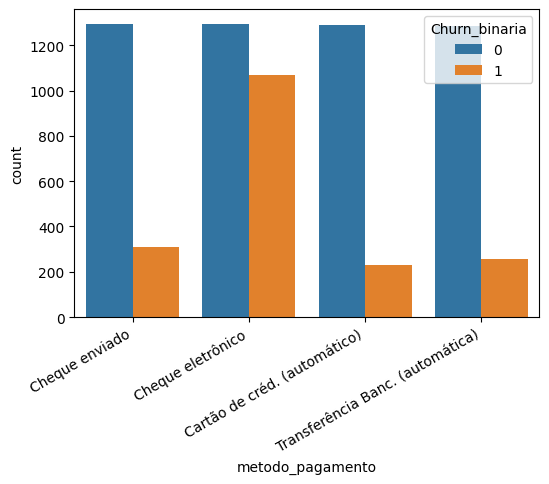

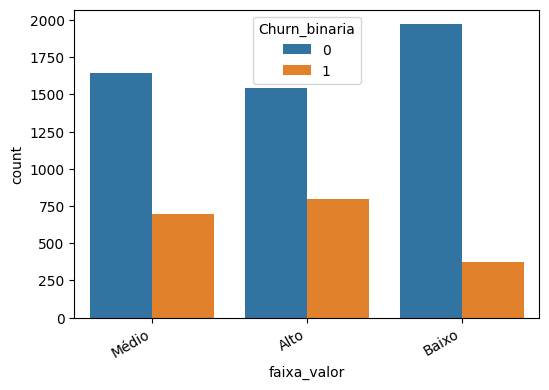

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns # Redefine categorical_cols
for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data = df, x = col, hue = 'Churn_binaria')
  plt.xticks(rotation = 30, ha='right')

  plt.show()

In [ ]:
df = df.drop(columns=['Churn'])

Feature selection estatística

In [ ]:


df_rank = df.copy()

# Separar variáveis categóricas
categorical_cols = df_rank.select_dtypes(include=["object"]).columns

# Aplicar Label Encoding temporário (apenas para teste estatístico)
le = LabelEncoder()
for col in categorical_cols:
    df_rank[col] = le.fit_transform(df_rank[col])

# Separar X e y
X_cat = df_rank[categorical_cols]
y = df_rank["Churn_binaria"]

# Aplicar teste Qui-quadrado
chi_scores, p_values = chi2(X_cat, y)

# Criar DataFrame com ranking
chi_df = pd.DataFrame({
    "Variável": categorical_cols,
    "Chi2 Score": chi_scores,
    "p-value": p_values
})

# Ordenar por importância
chi_df = chi_df.sort_values(by="Chi2 Score", ascending=False)

chi_df

,Variável,Chi2 Score,p-value
12,tipo_contrato,392.706273,2.131687e-87
6,seguranca_online,147.165601,7.219883e-34
9,suporte_tecnico,135.439602,2.645952e-31
2,possui_dependentes,131.271509,2.159540e-30
13,fatura_digital,104.979224,1.234232e-24
1,possui_parceiro,81.857769,1.462409e-19
14,metodo_pagamento,31.337803,2.168166e-08
7,backup_online,31.209832,2.315902e-08
8,protecao_dispositivo,20.216007,6.917171e-06
10,streaming_tv,17.320615,3.157429e-05


In [ ]:
chi_df['p-value'] = pd.to_numeric(chi_df['p-value'], errors= 'coerce')

significant_vars = chi_df[chi_df["p-value"] < 0.05]
print("\n✅ Variables significativas (p < 0.05):")
display(significant_vars)


✅ Variables significativas (p < 0.05):


,Variável,Chi2 Score,p-value
12,tipo_contrato,392.706273,2.131687e-87
6,seguranca_online,147.165601,7.219883e-34
9,suporte_tecnico,135.439602,2.645952e-31
2,possui_dependentes,131.271509,2.159540e-30
13,fatura_digital,104.979224,1.234232e-24
1,possui_parceiro,81.857769,1.462409e-19
14,metodo_pagamento,31.337803,2.168166e-08
7,backup_online,31.209832,2.315902e-08
8,protecao_dispositivo,20.216007,6.917171e-06
10,streaming_tv,17.320615,3.157429e-05


In [ ]:
df = df.drop(columns=['genero', 'servico_telefone'])

In [ ]:
df.columns

Index(['tem_60mais', 'possui_parceiro', 'possui_dependentes', 'tempo_contrato',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'Churn_binaria', 'faixa_valor'],
      dtype='object')

## Investigar associação entre variáveis

In [ ]:
pd.crosstab(df['tipo_contrato'], df['metodo_pagamento'], normalize= 'index')

metodo_pagamento,Cartão de créd. (automático),Cheque eletrônico,Cheque enviado,Transferência Banc. (automática)
tipo_contrato,,,,
Anual,0.270380,0.235734,0.228261,0.265625
Bienal,0.344214,0.099703,0.222552,0.333531
Mensal,0.140129,0.477419,0.230452,0.152000


## Muitos clientes com contrato mensal usam cheque eletrônico. Por isso, o impacto no churn pode estar mais ligado ao tipo de contrato do que ao método de pagamento **sozinho**

In [ ]:
x = df.drop(columns= ['Churn_binaria'])
y = df['Churn_binaria']




In [ ]:
x.select_dtypes(include = 'object').columns

Index(['possui_parceiro', 'possui_dependentes', 'multiplas_linhas',
       'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'faixa_valor'],
      dtype='object')

In [ ]:
x.dtypes.value_counts()

,count
object,14
int64,2
float64,1


# Padronizar

In [ ]:
#separar treino de teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    random_state=42,
    stratify = y

)

In [ ]:
x_test = pd.get_dummies(x_test, drop_first = True)
x_train = pd.get_dummies(x_train, drop_first = True)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

### Verificação desbalanceamento

In [ ]:
y_train.value_counts(normalize = True) * 100

,proportion
Churn_binaria,
0,73.422222
1,26.577778


In [ ]:
#identificar variáveis contínuas que geralmente são as float
num_cols = x_train.select_dtypes(include = ['float64']).columns
num_cols

Index(['valor_mensal'], dtype='object')

In [ ]:
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [ ]:
corre_matrix = df.select_dtypes(include = ['int64', 'float64']).corr()
corre_matrix

,tem_60mais,tempo_contrato,valor_mensal,Churn_binaria
tem_60mais,1.000000,0.015683,0.219874,0.150541
tempo_contrato,0.015683,1.000000,0.246862,-0.354049
valor_mensal,0.219874,0.246862,1.000000,0.192858
Churn_binaria,0.150541,-0.354049,0.192858,1.000000


A matriz de coreelação indicou que 'tempo de contrato' possui relação negativa moderada com  churn (-0.35), sugerindo que clientes mais antigos cancelem menos.Já o valor mensal apresentou correlação positiva (0.19), indicando maior propensão ao cancelamento entree clientes que pagam mais

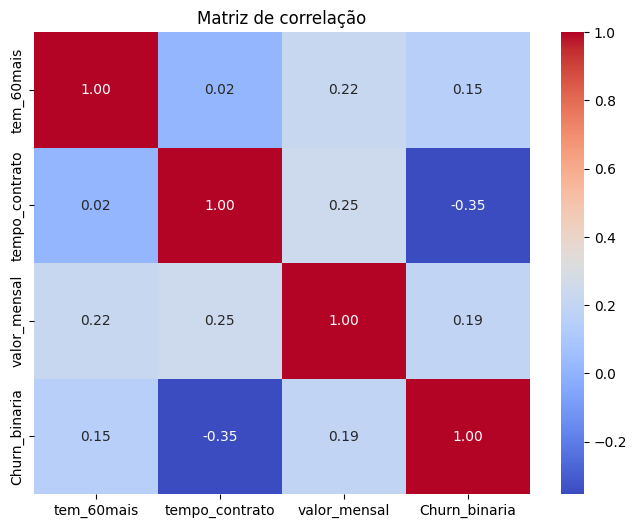

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corre_matrix, annot =True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Matriz de correlação')
plt.show()

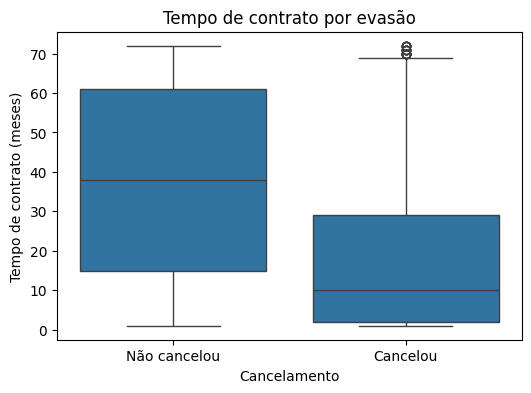

In [ ]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Churn_binaria', y= 'tempo_contrato', data=df)
plt.xticks([0,1], ['Não cancelou', 'Cancelou'])

plt.title('Tempo de contrato por evasão')
plt.xlabel('Cancelamento')
plt.ylabel('Tempo de contrato (meses)')
plt.show()

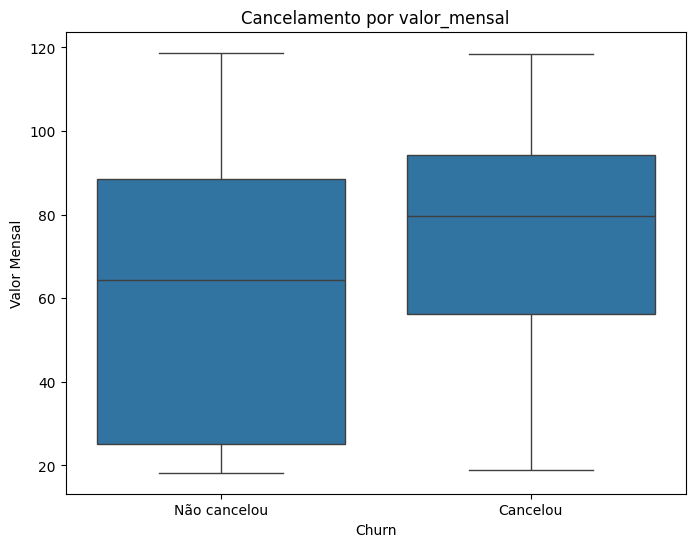

In [ ]:
plt.figure(figsize =(8,6))
sns.boxplot(x = 'Churn_binaria', y = 'valor_mensal', data =df)
plt.xticks([0,1], ['Não cancelou', 'Cancelou'])
plt.xlabel('Churn')
plt.ylabel('Valor Mensal')
plt.title('Cancelamento por valor_mensal')
plt.show()

# Modelagem preditiva

In [ ]:
#modelo1

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

print('===Regressão Logistíca===')
print('Accuracy:', accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print( classification_report(y_test, y_pred_log))

===Regressão Logistíca===
Accuracy: 0.7981520966595593
[[927 106]
 [178 196]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
#modelo1 balanceado
log_model_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model_bal.fit(x_train, y_train)
y_pred_log_bal = log_model_bal.predict(x_test)

print('===Regressão Logistíca===')
print('Accuracy:', accuracy_score(y_test, y_pred_log_bal))
print(confusion_matrix(y_test, y_pred_log_bal))
print( classification_report(y_test, y_pred_log_bal))

===Regressão Logistíca===
Accuracy: 0.7427149964463398
[[749 284]
 [ 78 296]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



In [ ]:
#modelo2
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print('===Random Forest===')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

===Random Forest===
Accuracy: 0.7874911158493249
[[924 109]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#modelo2 balanceada
rf_model_bal = RandomForestClassifier(random_state = 42, class_weight='balanced')
rf_model_bal.fit(x_train, y_train)
y_pred_rf_bal = rf_model.predict(x_test)

print('===Random Forest===')
print('Accuracy:', accuracy_score(y_test, y_pred_rf_bal))
print(confusion_matrix(y_test, y_pred_rf_bal))
print(classification_report(y_test, y_pred_rf_bal))

===Random Forest===
Accuracy: 0.7874911158493249
[[924 109]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Melhor modelo até o momento: **Regressão Logística com balanceamento** (melhor recall para churn)

In [ ]:

comparacao = pd.DataFrame([
    {"Modelo": "Regressão Logística", "Accuracy": 0.7967, "Precision (Churn=1)": 0.65, "Recall (Churn=1)": 0.52, "F1 (Churn=1)": 0.58},
    {"Modelo": "Regressão Logística (Balanceada)", "Accuracy": 0.7456, "Precision (Churn=1)": 0.51, "Recall (Churn=1)": 0.79, "F1 (Churn=1)": 0.62},
    {"Modelo": "Random Forest", "Accuracy": 0.7939, "Precision (Churn=1)": 0.64, "Recall (Churn=1)": 0.50, "F1 (Churn=1)": 0.56},
    {"Modelo": "Random Forest (Balanceada)", "Accuracy": 0.7797, "Precision (Churn=1)": 0.61, "Recall (Churn=1)": 0.46, "F1 (Churn=1)": 0.53},
])


comparacao = comparacao.sort_values(by="Recall (Churn=1)", ascending=False).reset_index(drop=True)
comparacao

,Modelo,Accuracy,Precision (Churn=1),Recall (Churn=1),F1 (Churn=1)
0,Regressão Logística (Balanceada),0.7456,0.51,0.79,0.62
1,Regressão Logística,0.7967,0.65,0.52,0.58
2,Random Forest,0.7939,0.64,0.50,0.56
3,Random Forest (Balanceada),0.7797,0.61,0.46,0.53


In [ ]:
#coeficientes
coef = pd.Series(log_model_bal.coef_[0], index=x_train.columns)
coef = coef.sort_values(key=abs, ascending=False)
coef_top10 = coef.head(10).to_frame('coeficiente')
display(coef_top10)

,coeficiente
tipo_internet_Fiber optic,0.919089
tipo_internet_Não,-0.873369
tipo_contrato_Mensal,0.732627
tipo_contrato_Bienal,-0.636278
faixa_valor_Baixo,0.468980
metodo_pagamento_Cheque eletrônico,0.440824
streaming_tv_Sim,0.377954
suporte_tecnico_Sim,-0.354484
fatura_digital_Sim,0.339064
seguranca_online_Sim,-0.292063


In [ ]:

importancias = pd.Series(
    rf_model_bal.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

importancias_top10 = importancias.head(10).to_frame("importancia")

display(importancias_top10)

,importancia
tempo_contrato,0.226043
valor_mensal,0.225309
tipo_contrato_Mensal,0.100806
metodo_pagamento_Cheque eletrônico,0.039911
tipo_internet_Fiber optic,0.037431
tipo_contrato_Bienal,0.036941
fatura_digital_Sim,0.029202
possui_parceiro_Sim,0.027822
seguranca_online_Sim,0.027811
suporte_tecnico_Sim,0.024885


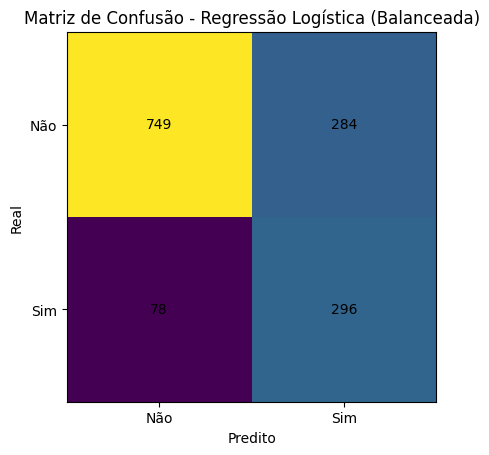

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_log_bal)


plt.figure()
plt.imshow(cm)
plt.title("Matriz de Confusão - Regressão Logística (Balanceada)")
plt.xlabel("Predito")
plt.ylabel("Real")

# Colocar números dentro da matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.xticks([0,1], ["Não", "Sim"])
plt.yticks([0,1], ["Não", "Sim"])

plt.show()

In [ ]:
print(y_train.value_counts())

Churn_binaria
0    4130
1    1495
Name: count, dtype: int64


In [ ]:
print("Total base:", df.shape[0])
print("Total teste:", y_test.shape[0])
print("Churn no teste:")
print(y_test.value_counts())

Total base: 7032
Total teste: 1407
Churn no teste:
Churn_binaria
0    1033
1     374
Name: count, dtype: int64


#📄Relatorio Final

# 📊 Telecom X — Análise de Evasão de Clientes (Churn)

## Objetivo

Identificar os principais fatores associados ao cancelamento de clientes e desenvolver um modelo preditivo capaz de estimar a probabilidade de churn para apoiar estratégias de retenção.

Base analisada: **7.032 clientes**.

---

##  Análise Exploratória

Principais achados:

- **Tempo de contrato** apresentou correlação negativa moderada com churn (-0.35).
- Clientes com **contrato mensal** apresentam maior taxa de evasão.
- **Valor mensal mais elevado** mostrou associação positiva com cancelamento.
- A ausência de serviços adicionais (segurança, suporte técnico) está relacionada a maior risco.

Os resultados indicam que estabilidade contratual e nível de engajamento influenciam diretamente o churn.

---

## Modelagem Preditiva

Foram testados dois modelos:

- Regressão Logística  
- Random Forest  

Devido ao desbalanceamento da base (~27% churn), aplicou-se versão com **balanceamento de classes**.

###  Melhor desempenho: Regressão Logística Balanceada

- **Recall (churn): 79%**
- **Precision: 51%**
- **F1-score: 0.62**

O modelo prioriza a identificação de clientes que realmente cancelam (alto recall), aceitando maior número de falsos positivos como trade-off estratégico.

---

## Principais Fatores de Risco

Variáveis com maior impacto na probabilidade de churn:

- Contrato mensal  
- Baixo tempo de permanência  
- Valor mensal elevado  
- Método de pagamento específico  
- Ausência de serviços adicionais  

Contratos de maior duração demonstram efeito protetivo.

---

##  Insights:

Com base nos resultados, recomenda-se:

- Priorizar clientes com contrato mensal e menos de 12 meses em campanhas preventivas.
- Incentivar migração para contratos anuais ou de maior duração.
- Oferecer pacotes com serviços adicionais para aumentar engajamento.
- Utilizar a probabilidade estimada pelo modelo para criar um ranking de risco e direcionar ações de retenção.

O threshold de decisão pode ser ajustado conforme a estratégia da empresa:
- Maior recall para reduzir perda de receita.
- Maior precision para reduzir custo de campanhas.

---

## Conclusão

A evasão apresenta padrões claros e previsíveis.  
A regressão logística balanceada demonstrou equilíbrio entre desempenho e interpretabilidade.

Como o churn impacta diretamente a receita recorrente, a capacidade de antecipar cancelamentos permite à empresa agir de forma preventiva e reduzir perdas financeiras por meio de ações direcionadas.